# COOKING EQUIPMENT

### Python code loads the data from the provided CSV file. Splits it into Variant A (control) and Variant B (experiment). Compares the distributions of each metric between the two variants using histograms and performs a two-sample t-test. It will then print whether to reject the null hypothesis or fail to reject it based on the p-value.
### This is done to all the metrics from the data set just to see how it looks like. But there is a primary metric that I talk more about in my power point presentation.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load data
data = pd.read_csv('sources/data.csv')
data

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.00,0,2,74,0
1,A,4,0.00,4,1,21,1
2,A,4,0.00,2,0,1,2
3,A,5,0.00,0,1,26,3
4,A,5,0.00,3,3,46,4
...,...,...,...,...,...,...,...
1995,B,3,0.00,1,0,1,1995
1996,B,3,0.00,1,2,31,1996
1997,B,3,0.00,2,0,3,1997
1998,B,4,87.08,2,1,11,1998


## DISTRIBUTION OF EACH METRIC VISUALIZED

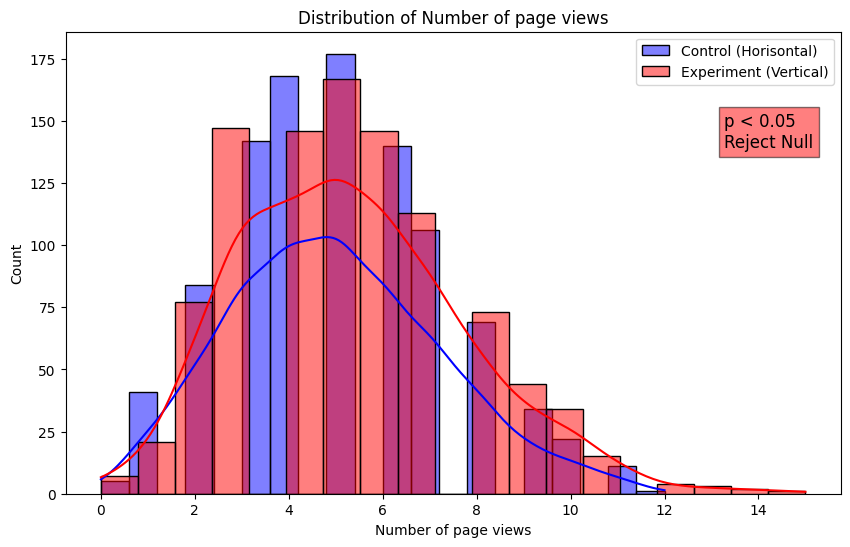

Metric: Number of page views
T-Statistic: -3.188164513387701
P-value: 0.0014539424660364975


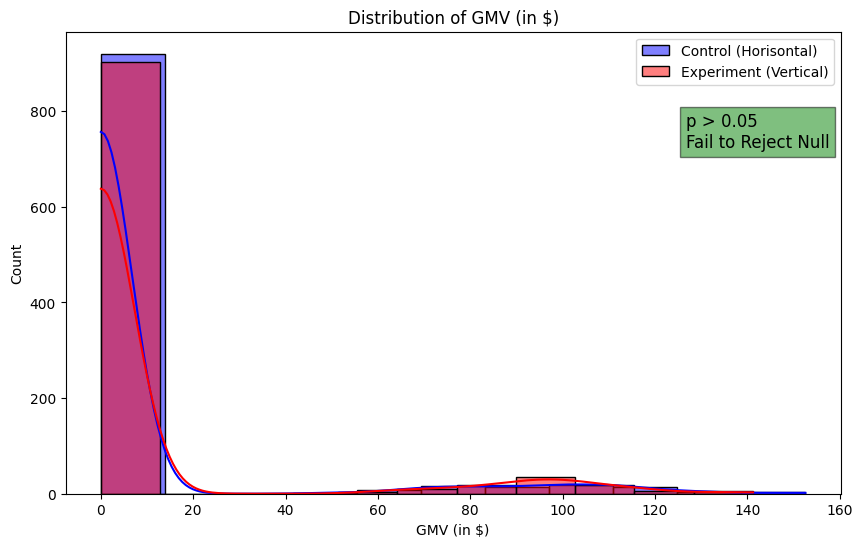

Metric: GMV (in $)
T-Statistic: -1.2839539769831623
P-value: 0.19930692918202245


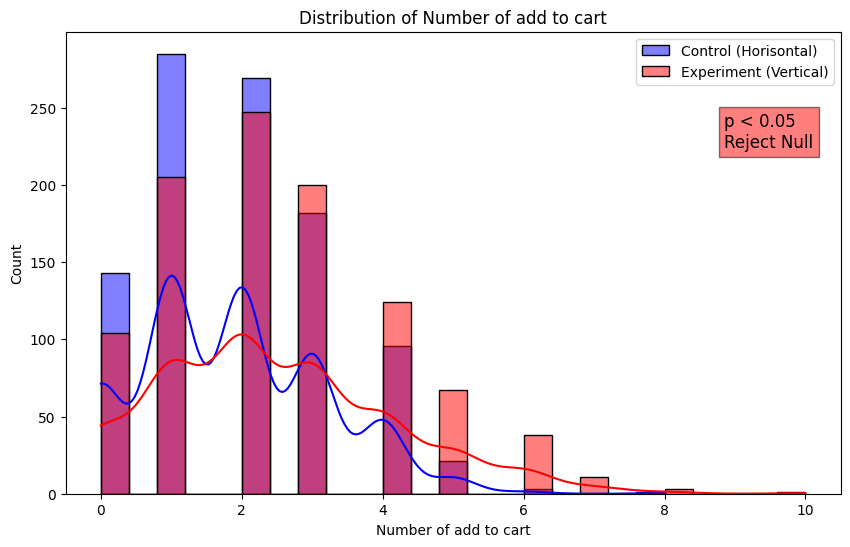

Metric: Number of add to cart
T-Statistic: -8.777389396187946
P-value: 3.517078745065221e-18


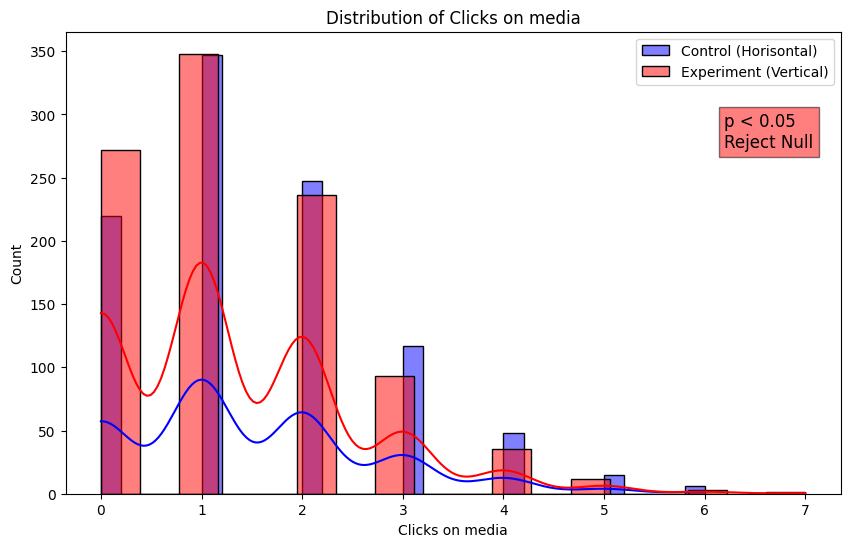

Metric: Clicks on media
T-Statistic: 3.1710702328903153
P-value: 0.0015418189281850279


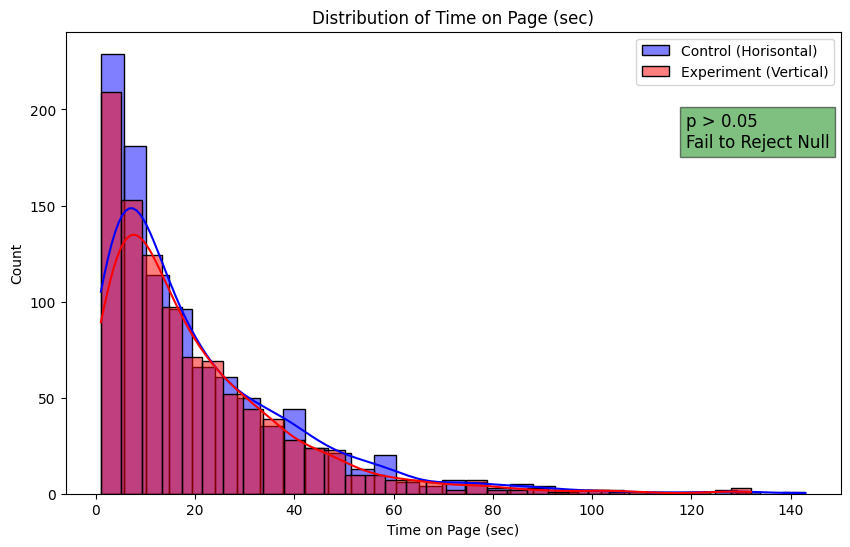

Metric: Time on Page (sec)
T-Statistic: 0.5554299489081426
P-value: 0.5786627940817111


In [3]:
# Filter data for each variant
variant_a = data[data['Variant'] == 'A']
variant_b = data[data['Variant'] == 'B']

# Plot distributions for each metric
metrics = ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.histplot(variant_a[metric], color='blue', alpha=0.5, label='Control (Horisontal)', kde=True)
    sns.histplot(variant_b[metric], color='red', alpha=0.5, label='Experiment (Vertical)', kde=True)
    plt.title(f'Distribution of {metric}')
    plt.legend()
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(variant_a[metric], variant_b[metric])
    
    # Add significance information to the plot
    if p_value < 0.05:
        plt.text(0.85, 0.75, 'p < 0.05\nReject Null', fontsize=12, bbox=dict(facecolor='red', alpha=0.5), transform=plt.gca().transAxes)
    else:
        plt.text(0.80, 0.75, 'p > 0.05\nFail to Reject Null', fontsize=12, bbox=dict(facecolor='green', alpha=0.5), transform=plt.gca().transAxes)
    
    plt.show()
    print(f"Metric: {metric}")
    print("T-Statistic:", t_stat)
    print("P-value:", p_value)